# Kaggle Presentation

## Understanding the Data set

In [1]:
import pandas as pd

player20_path = "C:\\Users\\Seith Sproule\\Documents\\UNI\\DATA 270\\Kaggle project\\players_20.csv"
combine_path = ["C:\\Users\\Seith Sproule\\Documents\\UNI\\DATA 270\\Kaggle project\\players_20.csv",
               "C:\\Users\\Seith Sproule\\Documents\\UNI\\DATA 270\\Kaggle project\\players_19.csv",
               "C:\\Users\\Seith Sproule\\Documents\\UNI\\DATA 270\\Kaggle project\\players_18.csv",
               "C:\\Users\\Seith Sproule\\Documents\\UNI\\DATA 270\\Kaggle project\\players_17.csv",
               "C:\\Users\\Seith Sproule\\Documents\\UNI\\DATA 270\\Kaggle project\\players_16.csv"]
dataframes = []
for combine_data in combine_path :
    df = pd.read_csv(combine_data)
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)
fifa_data = combined_df[['sofifa_id','short_name','age','nationality','overall','potential','pace','shooting','year','dribbling']]

fifa_data

,sofifa_id,short_name,age,nationality,overall,potential,pace,shooting,year,dribbling
0,158023,L. Messi,32,Argentina,94,94,87.0,92.0,2020,96.0
1,20801,Cristiano Ronaldo,34,Portugal,93,93,90.0,93.0,2020,89.0
2,190871,Neymar Jr,27,Brazil,92,92,91.0,85.0,2020,95.0
3,200389,J. Oblak,26,Slovenia,91,93,NaN,NaN,2020,NaN
4,183277,E. Hazard,28,Belgium,91,91,91.0,83.0,2020,94.0
...,...,...,...,...,...,...,...,...,...,...
85525,224867,R. Horne,19,England,44,57,63.0,40.0,2016,47.0
85526,229852,C. Shephard,17,Wales,44,56,69.0,34.0,2016,49.0
85527,227910,L. Gooch,17,England,44,54,NaN,NaN,2016,NaN
85528,225339,S. Warburton,18,England,44,51,58.0,28.0,2016,45.0


In [2]:
fifa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85530 entries, 0 to 85529
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sofifa_id    85530 non-null  int64  
 1   short_name   85530 non-null  object 
 2   age          85530 non-null  int64  
 3   nationality  85530 non-null  object 
 4   overall      85530 non-null  int64  
 5   potential    85530 non-null  int64  
 6   pace         75986 non-null  float64
 7   shooting     75986 non-null  float64
 8   year         85530 non-null  int64  
 9   dribbling    75986 non-null  float64
dtypes: float64(3), int64(5), object(2)
memory usage: 6.5+ MB


In [4]:
fifa_data.isnull().sum()

sofifa_id         0
short_name        0
age               0
nationality       0
overall           0
potential         0
pace           9544
shooting       9544
year              0
dribbling      9544
dtype: int64

## Basic analyse

<Axes: >

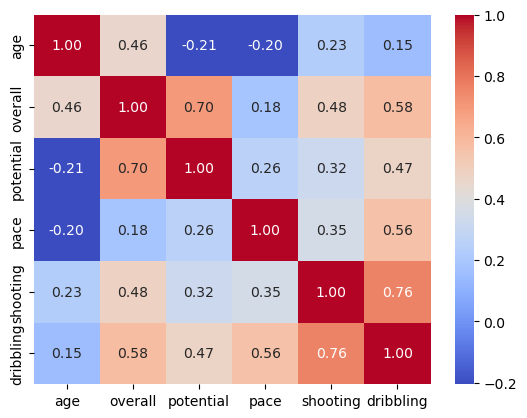

In [5]:
import seaborn as sns
fifa_corr = fifa_data[['age','overall','potential','pace','shooting','dribbling']].corr()
sns.heatmap(data=fifa_corr, cmap='coolwarm', annot=True, fmt=".2f") 

<Axes: title={'center': 'Distribution of the Players Overalls'}, xlabel='Overall', ylabel='Frequency'>

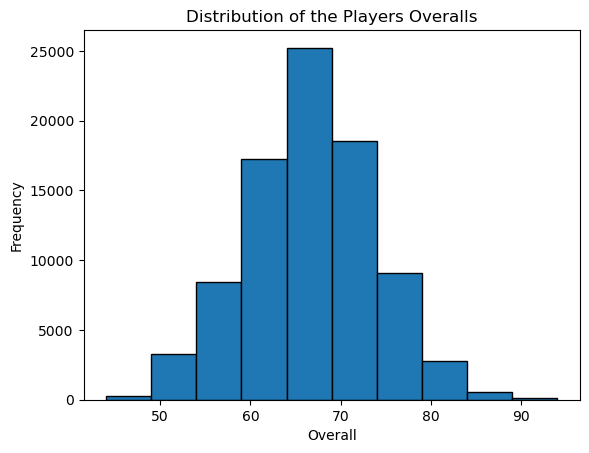

In [6]:
fifa_data.overall.plot.hist(x='overall', xlabel='Overall',title='Distribution of the Players Overalls',edgecolor= 'black')

## Player Development 

In [55]:
top_wk = fifa_data.query(' age <= 22 and year == 2016 and potential >= 85')
top_6 = top_wk.head(6)
top_6
#Top 5 wonderkinds

,sofifa_id,short_name,age,nationality,overall,potential,pace,shooting,year,dribbling
70672,195864,P. Pogba,22,France,86,92,77.0,80.0,2016,86.0
70700,199556,M. Verratti,22,Italy,84,89,68.0,58.0,2016,87.0
70735,193352,R. Rodriguez,22,Switzerland,83,87,75.0,67.0,2016,78.0
70737,212218,A. Laporte,21,France,83,87,73.0,37.0,2016,60.0
70771,201535,R. Varane,22,France,82,89,79.0,45.0,2016,63.0
70773,202652,R. Sterling,20,England,82,88,93.0,71.0,2016,87.0


In [59]:
wk = fifa_data[fifa_data['sofifa_id'].isin([195864, 199556, 193352, 212218, 201535,202652])]
wk['short_name'] = wk['short_name'].replace('R. Rodriguez', 'R. Rodríguez')
wk.head(6)

C:\Users\Seith Sproule\AppData\Local\Temp\ipykernel_20200\1047398275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wk['short_name'] = wk['short_name'].replace('R. Rodriguez', 'R. Rodríguez')


,sofifa_id,short_name,age,nationality,overall,potential,pace,shooting,year,dribbling
24,195864,P. Pogba,26,France,88,91,74.0,81.0,2020,85.0
26,202652,R. Sterling,24,England,88,90,93.0,79.0,2020,89.0
40,212218,A. Laporte,25,France,87,90,64.0,50.0,2020,68.0
58,199556,M. Verratti,26,Italy,86,89,65.0,60.0,2020,90.0
76,201535,R. Varane,26,France,85,90,83.0,45.0,2020,63.0
450,193352,R. Rodríguez,26,Switzerland,80,83,70.0,67.0,2020,76.0


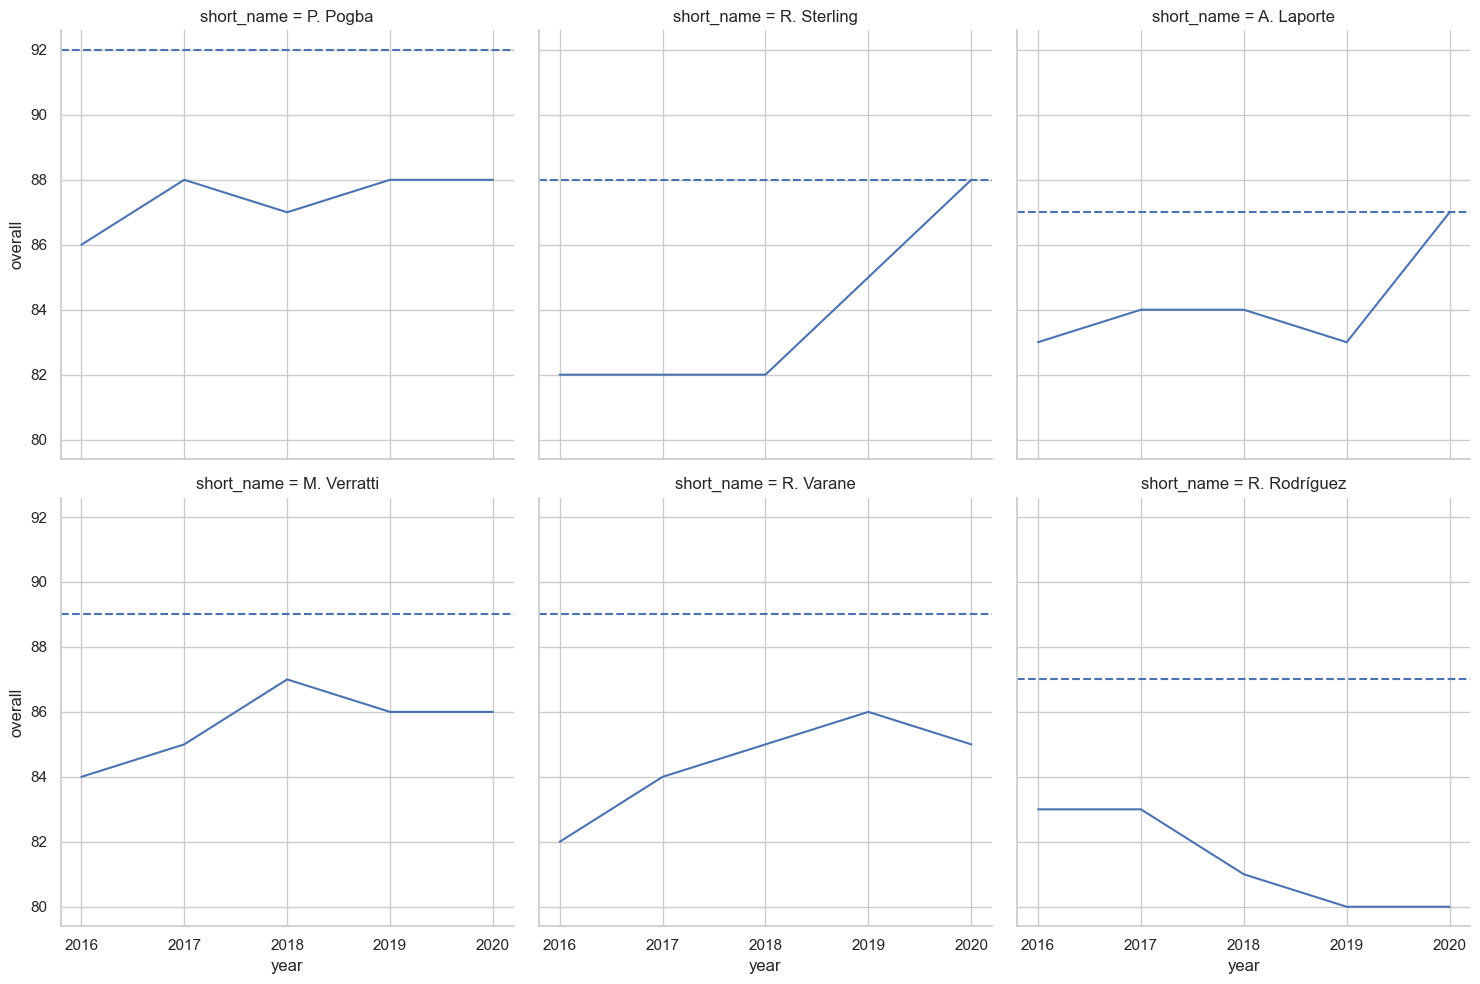

In [78]:
plot = sns.relplot(data=wk, x='year', y='overall', kind='line', markers=True, col='short_name', col_wrap=3)
plot.set(xticks=range(2016, 2021))
for short_name in wk['short_name'].unique():
    potential_2016 = wk[(wk['short_name'] == short_name) & (wk['year'] == 2016)]['potential'].values[0]
    for ax in plot.axes.flatten():
        if short_name in ax.get_title():
            ax.axhline(y=potential_2016, linestyle='--', label=f'{short_name} Potential 2016')


## Multiple Regression

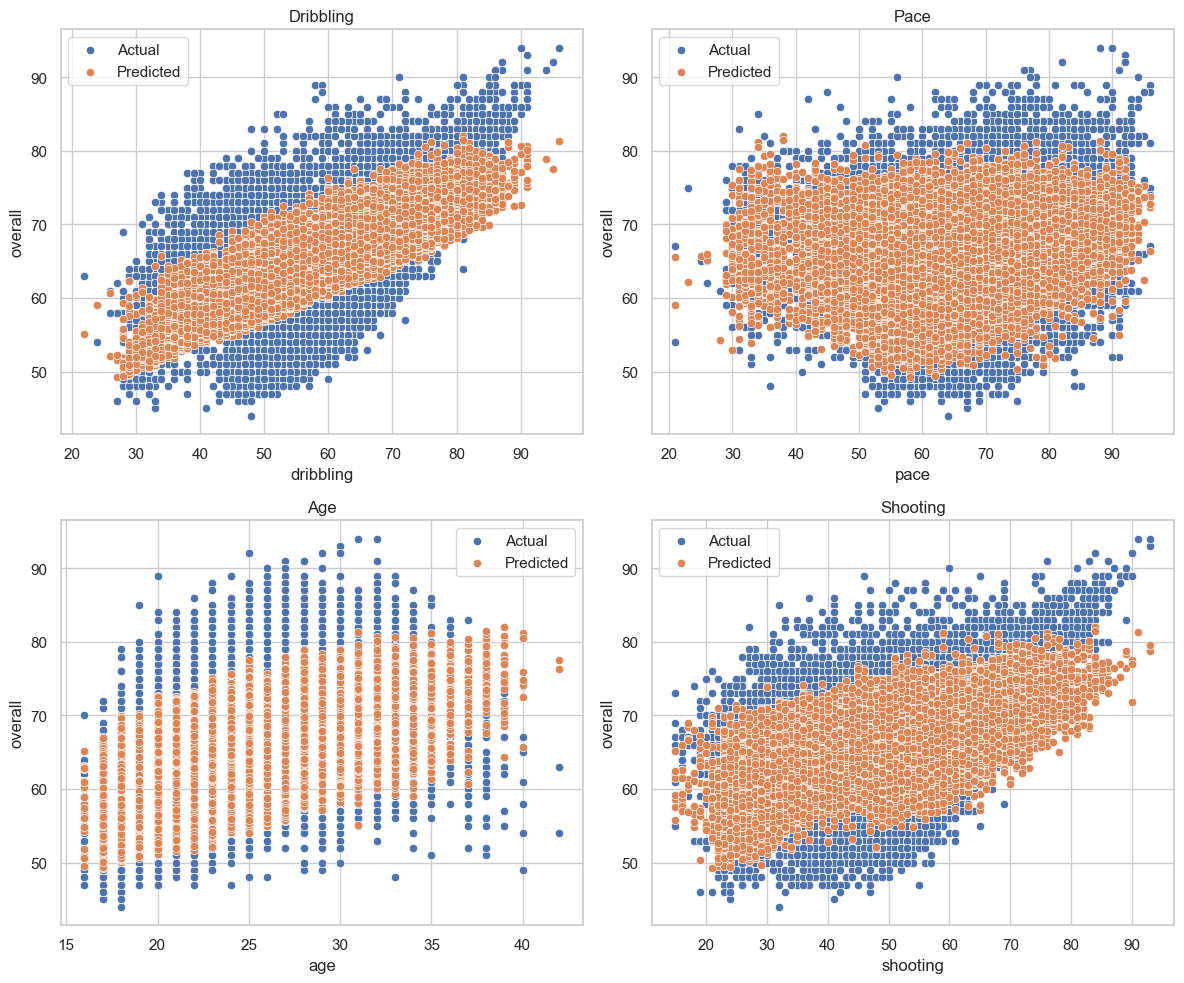

In [84]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

f = fifa_data.copy()
fifa_reg = f.dropna()

y=fifa_reg[['overall']]
x= fifa_reg[['dribbling','pace','age','shooting']]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot for 'dribbling'
sns.scatterplot(x=x_test['dribbling'], y=y_test['overall'], ax=axes[0, 0], label='Actual')
sns.scatterplot(x=x_test['dribbling'], y=y_pred.flatten(), ax=axes[0, 0], label='Predicted')
axes[0, 0].set_title('Dribbling')

# Plot for 'pace'
sns.scatterplot(x=x_test['pace'], y=y_test['overall'], ax=axes[0, 1], label='Actual')
sns.scatterplot(x=x_test['pace'], y=y_pred.flatten(), ax=axes[0, 1], label='Predicted')
axes[0, 1].set_title('Pace')

# Plot for 'age'
sns.scatterplot(x=x_test['age'], y=y_test['overall'], ax=axes[1, 0], label='Actual')
sns.scatterplot(x=x_test['age'], y=y_pred.flatten(), ax=axes[1, 0], label='Predicted')
axes[1, 0].set_title('Age')

# Plot for 'shooting'
sns.scatterplot(x=x_test['shooting'], y=y_test['overall'], ax=axes[1, 1], label='Actual')
sns.scatterplot(x=x_test['shooting'], y=y_pred.flatten(), ax=axes[1, 1], label='Predicted')
axes[1, 1].set_title('Shooting')
plt.tight_layout()
plt.show()


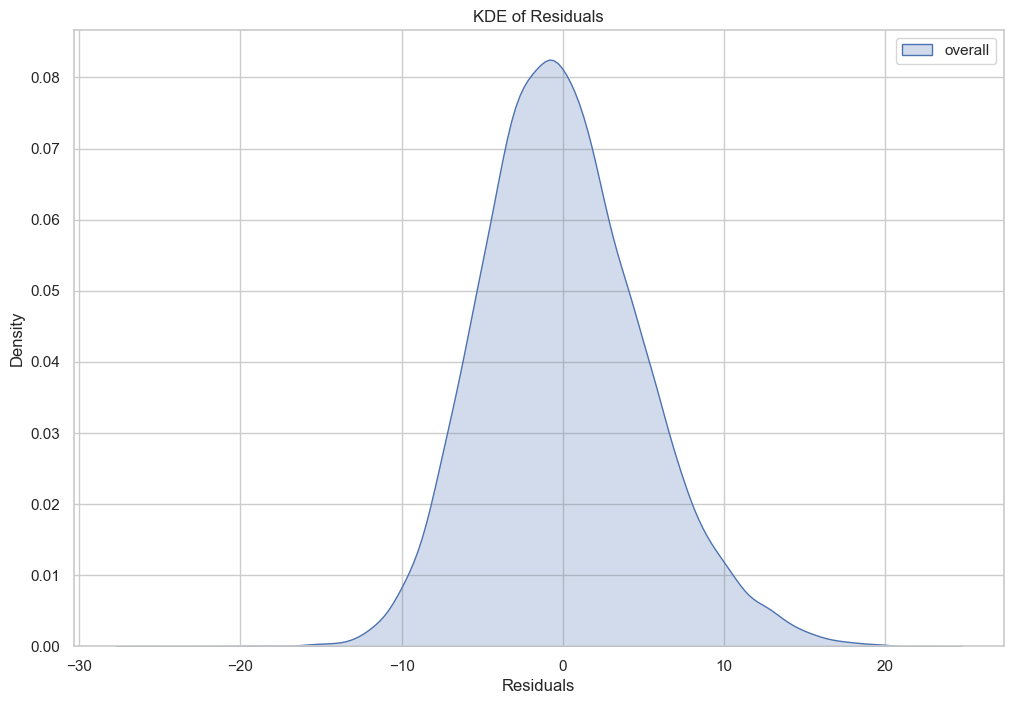

In [100]:
residuals = y_test - y_pred
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.kdeplot(data=residuals, fill=True)

plt.title('KDE of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()


## Significance Stats

In [102]:
import statsmodels.api as sms
y = fifa_reg['potential']
X = fifa_reg[['dribbling', 'pace', 'age' ,'shooting']]

# Add a constant term to the independent variables
X = sms.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

# Fit the OLS model
model = sms.OLS(y_test, X_test)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              potential   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     2644.
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:59:51   Log-Likelihood:                -69179.
No. Observations:               22796   AIC:                         1.384e+05
Df Residuals:                   22791   BIC:                         1.384e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.7124      0.314    209.145      0.000      65.097      66.328
dribbling      0.3678      0.006     65.060      0.000       0.357       0.379
pace          -0.0800      0.004    -20.840      0.000      -0.087      -0.072
age           -0.4418      0.008    -54.844      0.000      -0.458      -0.426
shooting      -0.0151      0.004     -4.009      0.000      -0.022      -0.008
==============================================================================
Omnibus:                      209.294   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.717
Skew:                           0.223   Prob(JB):                     5.29e-48
Kurtosis:                       3.173   Cond. No.                     1.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""